# NBA Historical View

# Imports

In [9]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer


import psycopg2
from dotenv import load_dotenv

# Constants

In [3]:
dotenv_path = ("/Users/maukanmir/Documents/Machine-Learning/NBA Projects/NBA-History-Analysis/dot.env")
load_dotenv(dotenv_path)

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
TABLE_NAME = "salaries_stats_heights"

In [6]:
conn = psycopg2.connect(
    host=DB_HOST,
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD,
    port=DB_PORT
)

query = f"SELECT * FROM {TABLE_NAME}"
df = pd.read_sql_query(query, conn)
conn.close()

/Users/maukanmir/miniforge3/envs/machine-learning-env/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
df

,pos,height,weight,age,nationality,college-team,draft-status,salary,Name,Team,...,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,season
0,SG,6-6,215,27,United States,North Carolina,1984 Rnd 1 Pick 3,2500000.0,Michael Jordan,CHI,...,8.2,0.851,1.4,4.6,6.0,5.5,2.7,1.0,2.5,1990-1991
1,PF,6-9,265,26,United States,Louisiana Tech,1985 Rnd 1 Pick 13,2260000.0,Karl Malone,UTA,...,10.8,0.770,2.9,8.9,11.8,3.3,1.1,1.0,3.0,1990-1991
2,SF,6-7,205,33,United States,Tennessee,1977 Rnd 1 Pick 7,1600000.0,Bernard King,WAS,...,7.6,0.790,1.8,3.2,5.0,4.6,0.9,0.3,4.0,1990-1991
3,PF,6-6,252,27,United States,Auburn,1984 Rnd 1 Pick 5,2900000.0,Charles Barkley,PHI,...,9.8,0.722,3.9,6.3,10.1,4.2,1.6,0.5,3.1,1990-1991
4,C,7-0,240,27,United StatesJamaica,Georgetown,1985 Rnd 1 Pick 1,4250000.0,Patrick Ewing,NYK,...,7.7,0.745,2.4,8.8,11.2,3.0,1.0,3.2,3.6,1990-1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7159,PF,6-7,210,24,Canada,Syracuse,"2019 NBA Draft, Undrafted",2165000.0,Oshae Brissett,BOS,...,1.5,0.602,1.1,1.8,2.9,0.8,0.3,0.1,0.4,2023-2024
7160,G,6-0,185,26,United States,USC,"2018 NBA Draft, Undrafted",2420000.0,Jordan McLaughlin,MIN,...,0.3,0.722,0.3,1.0,1.3,2.0,0.6,0.1,0.3,2023-2024
7161,PF,6-10,240,31,Canada,Stanford,2014 Rnd 2 Pick 15,4000000.0,Dwight Powell,DAL,...,1.4,0.708,1.5,1.9,3.4,1.3,0.4,0.3,0.5,2023-2024
7162,PF,6-9,240,22,United States,Arizona,2020 Rnd 1 Pick 22,4306281.0,Zeke Nnaji,DEN,...,1.1,0.677,1.1,1.1,2.2,0.6,0.3,0.7,0.5,2023-2024


# Functions

In [10]:
def check_for_nulls_dupes(df):
  print(f"The amount of Null Values: {df.isna().sum()}")
  print(f"The amount of Duplicated Values {df.duplicated().sum()}")

def create_sklearn_pipeline(model, kbest=None):
  steps = [
    ("Scaler", MinMaxScaler()),
    ("PowerTransformer", PowerTransformer()),
    ("model", model)
  ]
  
  if kbest:
    steps.insert(2, ("Feature Selection", kbest))
  
  return Pipeline(steps=steps)

# EDA Analysis

In [11]:
check_for_nulls_dupes(df)

The amount of Null Values: pos             0
height          0
weight          0
age             0
nationality     0
college-team    0
draft-status    0
salary          0
Name            0
Team            0
GP              0
MPG             0
PPG             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
ORB             0
DRB             0
RPG             0
APG             0
SPG             0
BPG             0
TOV             0
season          0
dtype: int64
The amount of Duplicated Values 0


In [12]:
df.dtypes

pos              object
height           object
weight            int64
age               int64
nationality      object
college-team     object
draft-status     object
salary          float64
Name             object
Team             object
GP                int64
MPG             float64
PPG             float64
FGM             float64
FGA             float64
FG%             float64
3PM             float64
3PA             float64
3P%             float64
FTM             float64
FTA             float64
FT%             float64
ORB             float64
DRB             float64
RPG             float64
APG             float64
SPG             float64
BPG             float64
TOV             float64
season           object
dtype: object

In [13]:
df.describe()

,weight,age,salary,GP,MPG,PPG,FGM,FGA,FG%,3PM,...,FTM,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV
count,7164.000000,7164.000000,7.164000e+03,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,...,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000
mean,220.081100,26.550251,5.868771e+06,70.501396,25.973786,11.215648,4.189489,9.068788,0.461778,0.773479,...,2.062605,2.700140,0.752582,1.233124,3.395980,4.627178,2.514419,0.842406,0.536488,1.512549
std,27.332273,3.958512,6.877985e+06,9.991962,7.937144,5.982018,2.161540,4.547569,0.056143,0.797294,...,1.536209,1.907387,0.101324,0.904331,1.840044,2.581510,2.038083,0.446776,0.548810,0.792857
min,133.000000,18.000000,5.000000e+04,30.000000,4.900000,0.800000,0.300000,0.600000,0.282000,0.000000,...,0.000000,0.000000,0.111000,0.100000,0.300000,0.400000,0.000000,0.000000,0.000000,0.100000
25%,200.000000,24.000000,1.517981e+06,64.000000,19.675000,6.600000,2.500000,5.500000,0.425000,0.000000,...,1.000000,1.300000,0.700000,0.500000,2.100000,2.700000,1.000000,0.500000,0.200000,0.900000
50%,220.000000,26.000000,3.200000e+06,73.000000,26.300000,10.100000,3.800000,8.300000,0.454000,0.600000,...,1.600000,2.200000,0.769000,1.000000,3.000000,4.000000,1.900000,0.800000,0.400000,1.400000
75%,240.000000,29.000000,7.612749e+06,79.000000,32.600000,14.700000,5.500000,11.900000,0.491000,1.300000,...,2.700000,3.600000,0.824000,1.700000,4.300000,5.900000,3.400000,1.100000,0.700000,2.000000
max,310.000000,42.000000,5.191562e+07,85.000000,43.700000,36.100000,12.700000,27.800000,0.763000,5.300000,...,10.200000,12.300000,1.000000,6.800000,12.300000,18.700000,14.200000,3.000000,4.500000,5.700000


In [15]:
df["height"] = df["height"].apply(lambda x: float(x.replace("-", ".")))

In [16]:
df

,pos,height,weight,age,nationality,college-team,draft-status,salary,Name,Team,...,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,season
0,SG,6.6,215,27,United States,North Carolina,1984 Rnd 1 Pick 3,2500000.0,Michael Jordan,CHI,...,8.2,0.851,1.4,4.6,6.0,5.5,2.7,1.0,2.5,1990-1991
1,PF,6.9,265,26,United States,Louisiana Tech,1985 Rnd 1 Pick 13,2260000.0,Karl Malone,UTA,...,10.8,0.770,2.9,8.9,11.8,3.3,1.1,1.0,3.0,1990-1991
2,SF,6.7,205,33,United States,Tennessee,1977 Rnd 1 Pick 7,1600000.0,Bernard King,WAS,...,7.6,0.790,1.8,3.2,5.0,4.6,0.9,0.3,4.0,1990-1991
3,PF,6.6,252,27,United States,Auburn,1984 Rnd 1 Pick 5,2900000.0,Charles Barkley,PHI,...,9.8,0.722,3.9,6.3,10.1,4.2,1.6,0.5,3.1,1990-1991
4,C,7.0,240,27,United StatesJamaica,Georgetown,1985 Rnd 1 Pick 1,4250000.0,Patrick Ewing,NYK,...,7.7,0.745,2.4,8.8,11.2,3.0,1.0,3.2,3.6,1990-1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7159,PF,6.7,210,24,Canada,Syracuse,"2019 NBA Draft, Undrafted",2165000.0,Oshae Brissett,BOS,...,1.5,0.602,1.1,1.8,2.9,0.8,0.3,0.1,0.4,2023-2024
7160,G,6.0,185,26,United States,USC,"2018 NBA Draft, Undrafted",2420000.0,Jordan McLaughlin,MIN,...,0.3,0.722,0.3,1.0,1.3,2.0,0.6,0.1,0.3,2023-2024
7161,PF,6.1,240,31,Canada,Stanford,2014 Rnd 2 Pick 15,4000000.0,Dwight Powell,DAL,...,1.4,0.708,1.5,1.9,3.4,1.3,0.4,0.3,0.5,2023-2024
7162,PF,6.9,240,22,United States,Arizona,2020 Rnd 1 Pick 22,4306281.0,Zeke Nnaji,DEN,...,1.1,0.677,1.1,1.1,2.2,0.6,0.3,0.7,0.5,2023-2024


In [17]:
numeric_cols = df.select_dtypes(include=["float64", "int64"])

<AxesSubplot:>

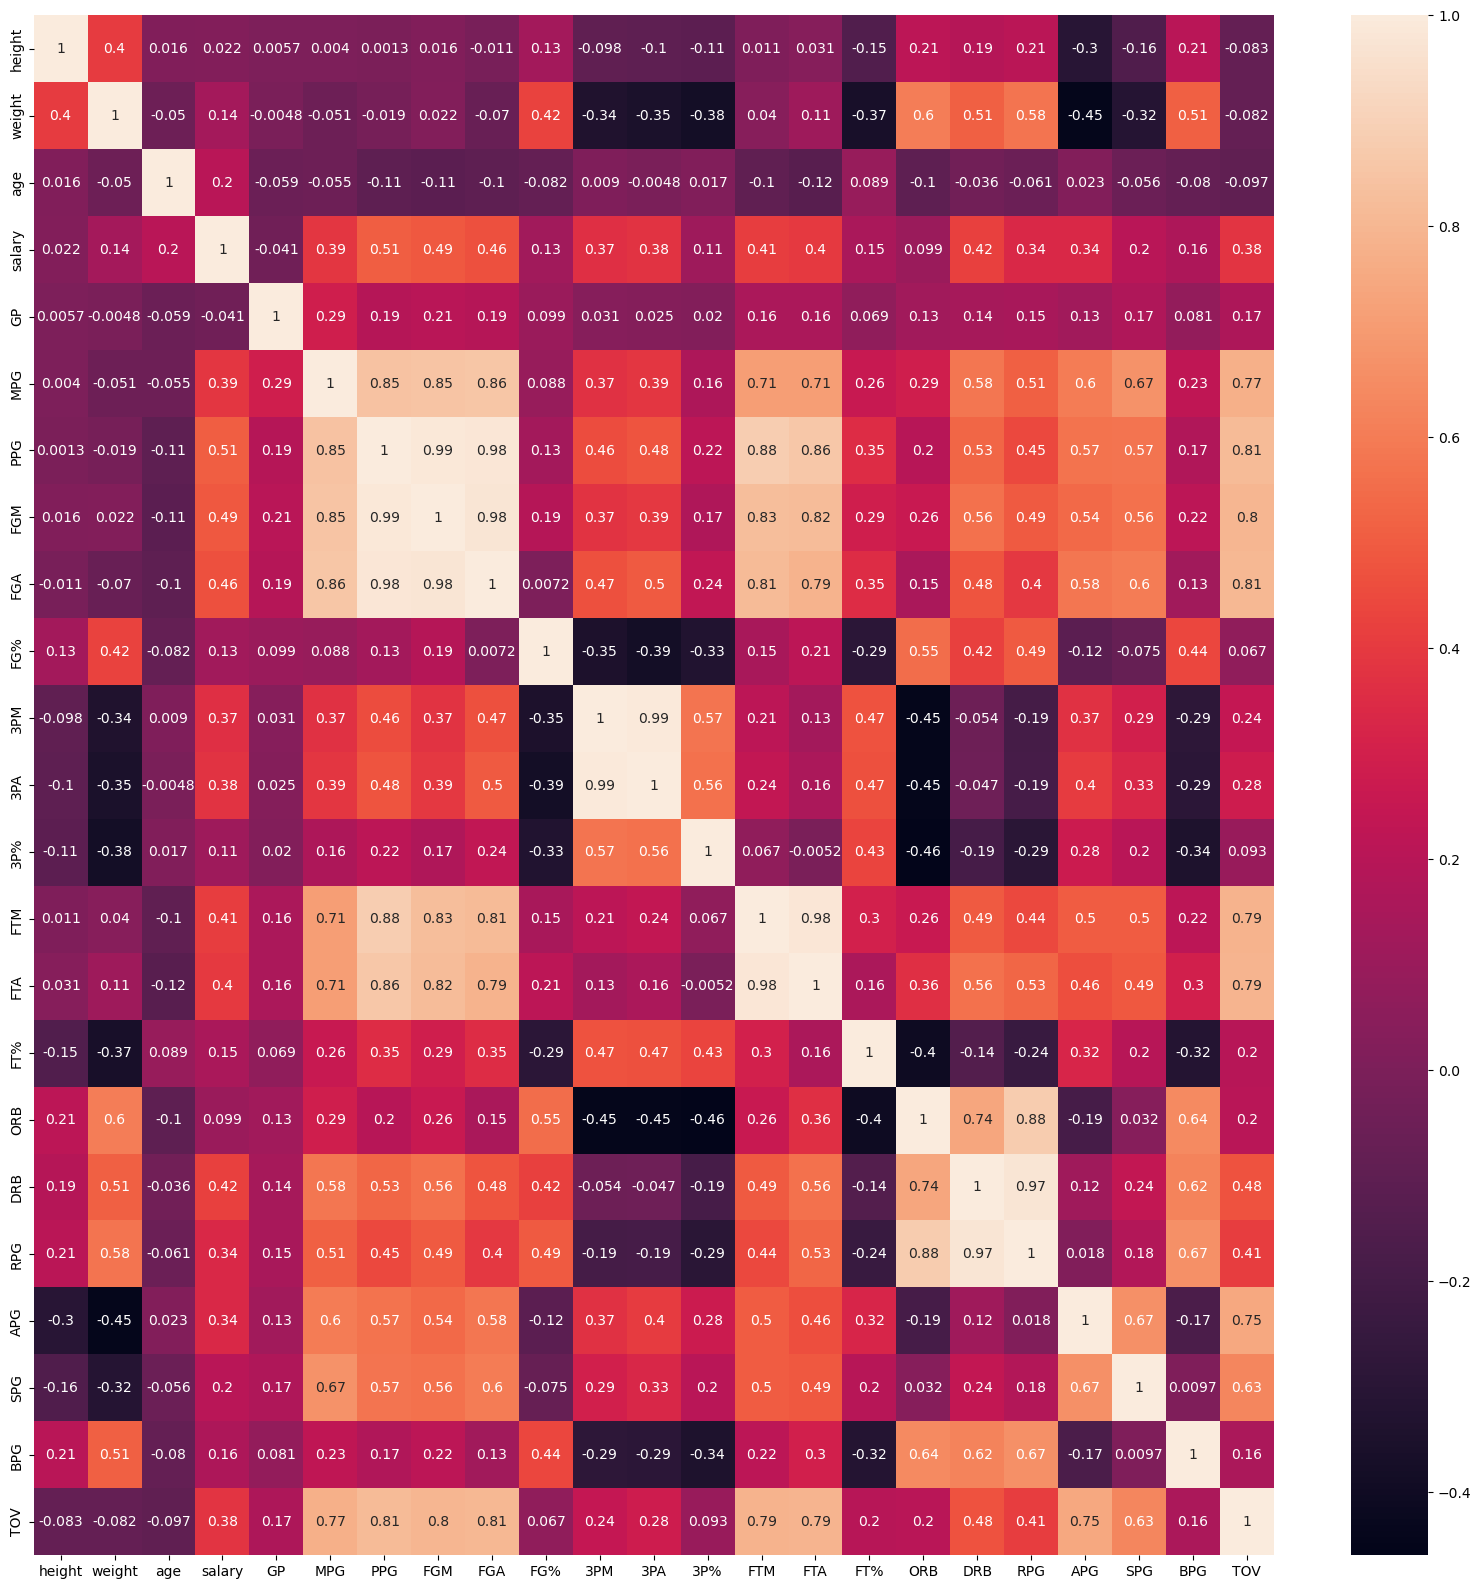

In [19]:
relations = numeric_cols.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(data=relations, annot=True)